In [1]:
##################################################################################################
##################################################################################################


### This file and the source code provided can be used only for the projects and assignments  
### of this course

### Last Edit by Dr. Atef Bader: 12/28/2018


##################################################################################################

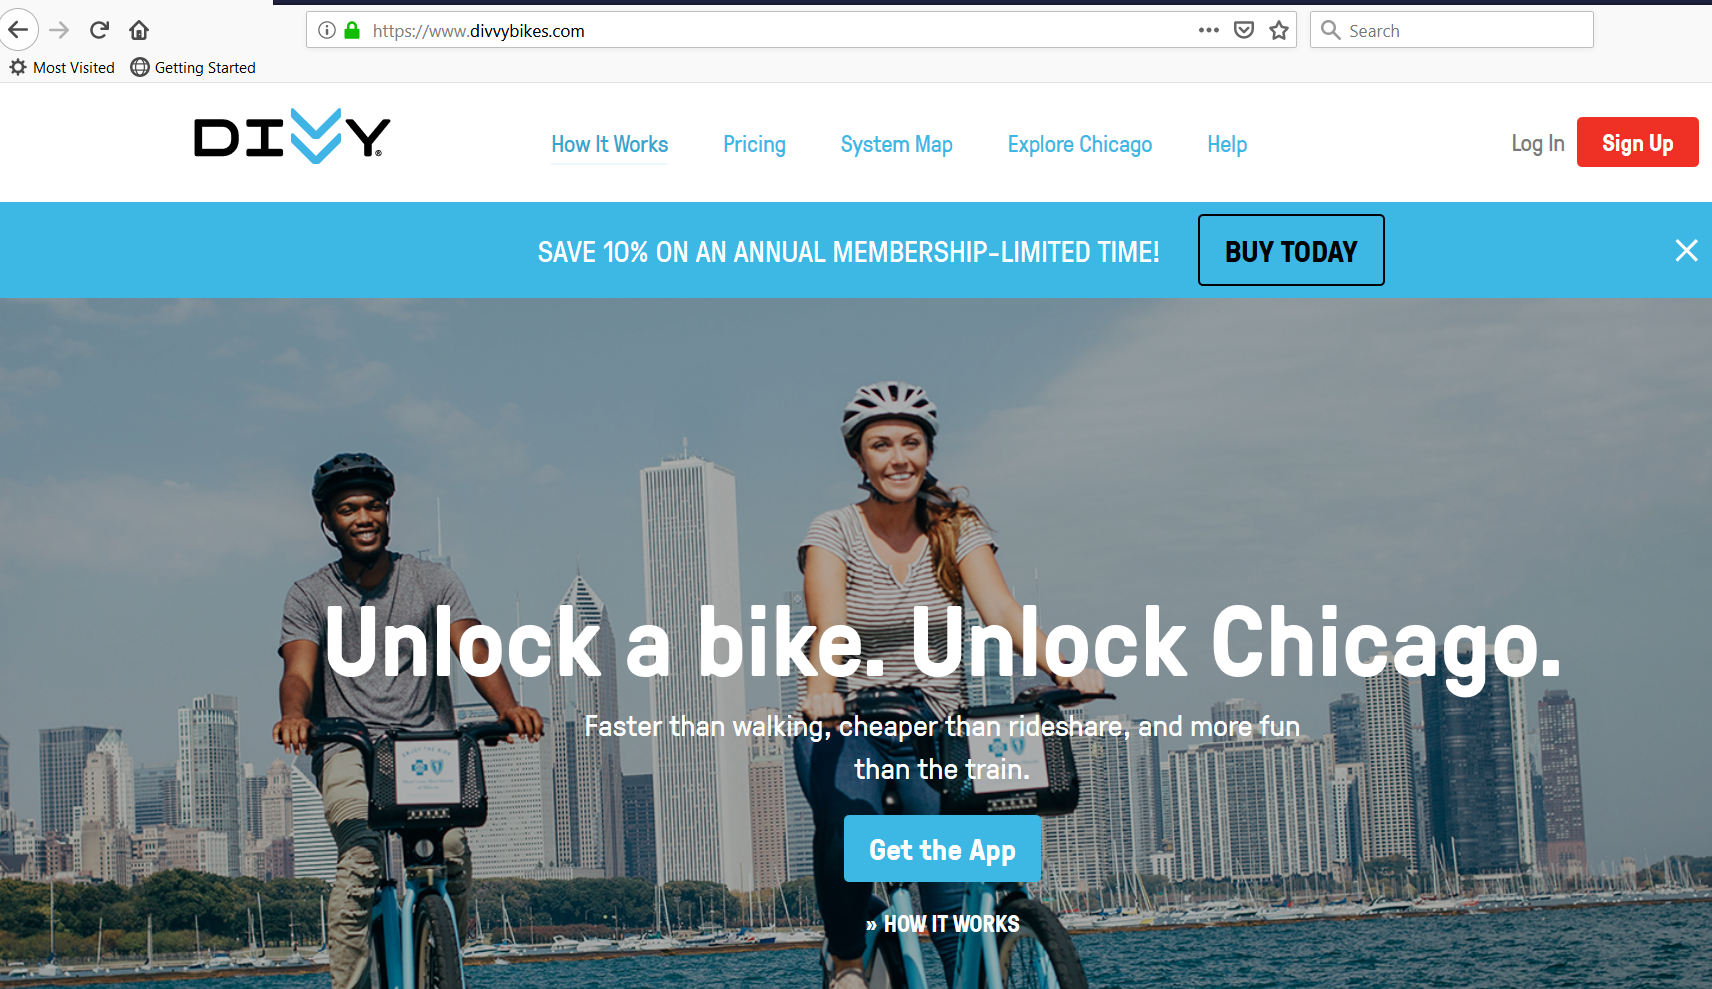

## Divvy

**Divvy** is a bicycle sharing system in the City of Chicago.

Click __[here](https://en.wikipedia.org/wiki/Divvy)__ to read more about **Divvy**


Click __[here](https://www.divvybikes.com/)__ to visit the official website for **Divvy**


This script will send a heartbeat every 2 minutes to divvy to collect their stations status in the City of Chicago.

### PostgreSQL

We will collect the data from **Divvy** servers and store the data in a table on **PostgreSQL** server.

This python script will send a heartbeat to Divvy every 2 minutes to retrieve the  status of the Divvy dock stations and store the data on PostgreSQL server.

You need the package **psycopg2** to Connect to **PostgreSQL** server.

Execute the **pip install** command from the command window to install  the package listed bove:
- pip install psycopg2

In [2]:
import json
import requests
import datetime
import time
import os
import psycopg2
import pandas as pd
import urllib.request
import json
import csv

from pprint import pprint
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT 


In [3]:
# Get divvy statations status
# Status is returned as a json reply

response = urllib.request.urlopen('https://feeds.divvybikes.com/stations/stations.json')

# Extract the body of the reply
response_body = response.read()

# Decode the format in json format
stations_json = json.loads(response_body.decode("utf-8"))


In [4]:
type(stations_json)

dict

In [5]:
pprint(stations_json)


{'executionTime': '2019-04-18 19:47:23',
 'stationBeanList': [{'altitude': '',
                      'availableBikes': 5,
                      'availableDocks': 33,
                      'city': 'Chicago',
                      'id': 2,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '15541',
                      'lastCommunicationTime': '2019-04-18 19:43:31',
                      'latitude': 41.87647,
                      'location': '',
                      'longitude': -87.62034,
                      'postalCode': '60605',
                      'stAddress1': 'Buckingham Fountain',
                      'stAddress2': '',
                      'stationName': 'Buckingham Fountain',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 39},
         

                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13051',
                      'lastCommunicationTime': '2019-04-18 19:45:08',
                      'latitude': 41.890359,
                      'location': '',
                      'longitude': -87.617532,
                      'postalCode': '60611',
                      'stAddress1': 'McClurg Ct & Illinois St',
                      'stAddress2': '',
                      'stationName': 'McClurg Ct & Illinois St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 31},
                     {'altitude': '',
                      'availableBikes': 17,
                      'availableDocks': 2,
                      'city': 'Chicago',
                      'id': 27,
                      'is_renting': T

                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 19},
                     {'altitude': '',
                      'availableBikes': 4,
                      'availableDocks': 23,
                      'city': 'Chicago',
                      'id': 38,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '15547',
                      'lastCommunicationTime': '2019-04-18 19:43:52',
                      'latitude': 41.88602082773,
                      'location': '',
                      'longitude': -87.6308760584,
                      'postalCode': '60601',
                      'stAddress1': 'Clark St & Lake St',
                      'stAddress2': '',
                      'stationName': 'Clark St & Lake St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In

                      'location': '80 S Dearborn St',
                      'longitude': -87.6295209193,
                      'postalCode': '60603',
                      'stAddress1': 'Dearborn St & Monroe St',
                      'stAddress2': '',
                      'stationName': 'Dearborn St & Monroe St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 39},
                     {'altitude': '',
                      'availableBikes': 8,
                      'availableDocks': 27,
                      'city': 'Chicago',
                      'id': 50,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13009',
                      'lastCommunicationTime': '2019-04-18 19:43:20',
                      'latitude': 41.8759326655,
               

                      'availableBikes': 10,
                      'availableDocks': 9,
                      'city': 'Chicago',
                      'id': 61,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13221',
                      'lastCommunicationTime': '2019-04-18 19:46:00',
                      'latitude': 41.907655,
                      'location': '1416 N Wood St',
                      'longitude': -87.672552,
                      'postalCode': '60622',
                      'stAddress1': 'Wood St & Milwaukee Ave',
                      'stAddress2': '',
                      'stationName': 'Wood St & Milwaukee Ave',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 19},
                     {'altitude': '',
                      'av

                      'id': 86,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13289',
                      'lastCommunicationTime': '2019-04-18 19:45:13',
                      'latitude': 41.89637337,
                      'location': '811 N Noble St',
                      'longitude': -87.66098386,
                      'postalCode': '60642',
                      'stAddress1': 'Eckhart Park',
                      'stAddress2': '',
                      'stationName': 'Eckhart Park',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 19},
                     {'altitude': '',
                      'availableBikes': 10,
                      'availableDocks': 9,
                      'city': 'Chicago',
                      'id': 87,
           

                      'testStation': False,
                      'totalDocks': 16},
                     {'altitude': '',
                      'availableBikes': 5,
                      'availableDocks': 20,
                      'city': 'Chicago',
                      'id': 106,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13014',
                      'lastCommunicationTime': '2019-04-18 19:46:58',
                      'latitude': 41.897448,
                      'location': '',
                      'longitude': -87.628722,
                      'postalCode': '60610',
                      'stAddress1': 'State St & Pearson St',
                      'stAddress2': '',
                      'stationName': 'State St & Pearson St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False

                      'longitude': -87.65304,
                      'postalCode': '60657',
                      'stAddress1': 'Wilton Ave & Belmont Ave',
                      'stAddress2': '',
                      'stationName': 'Wilton Ave & Belmont Ave',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 27},
                     {'altitude': '',
                      'availableBikes': 11,
                      'availableDocks': 8,
                      'city': 'Chicago',
                      'id': 118,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13070',
                      'lastCommunicationTime': '2019-04-18 19:43:22',
                      'latitude': 41.911386,
                      'location': '',
                      'longitude': -8

                      'city': 'Chicago ',
                      'id': 129,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13135',
                      'lastCommunicationTime': '2019-04-18 19:44:00',
                      'latitude': 41.857556,
                      'location': '',
                      'longitude': -87.661535,
                      'postalCode': '60608',
                      'stAddress1': 'Blue Island Ave & 18th St',
                      'stAddress2': '',
                      'stationName': 'Blue Island Ave & 18th St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 15},
                     {'altitude': '',
                      'availableBikes': 12,
                      'availableDocks': 7,
                      'city': 'Ch

                      'lastCommunicationTime': '2019-04-18 19:43:18',
                      'latitude': 41.838556,
                      'location': '',
                      'longitude': -87.608218,
                      'postalCode': '60616',
                      'stAddress1': 'Fort Dearborn Dr & 31st St',
                      'stAddress2': '',
                      'stationName': 'Fort Dearborn Dr & 31st St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 27},
                     {'altitude': '',
                      'availableBikes': 14,
                      'availableDocks': 1,
                      'city': 'Chicago ',
                      'id': 152,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13226',
                      'lastComm

                     {'altitude': '',
                      'availableBikes': 5,
                      'availableDocks': 2,
                      'city': 'Chicago ',
                      'id': 167,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13306',
                      'lastCommunicationTime': '2019-04-18 19:46:16',
                      'latitude': 41.8492,
                      'location': '',
                      'longitude': -87.67564,
                      'postalCode': '60608',
                      'stAddress1': 'Damen Ave & Coulter St',
                      'stAddress2': '',
                      'stationName': 'Damen Ave & Coulter St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 7},
                     {'altitude': '',
      

                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13011',
                      'lastCommunicationTime': '2019-04-18 19:45:27',
                      'latitude': 41.879255,
                      'location': '',
                      'longitude': -87.639904,
                      'postalCode': '60661',
                      'stAddress1': 'Canal St & Adams St',
                      'stAddress2': '',
                      'stationName': 'Canal St & Adams St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 47},
                     {'altitude': '',
                      'availableBikes': 2,
                      'availableDocks': 9,
                      'city': 'Chicago',
                      'id': 193,
                      'is_renting': True,
     

                      'location': '',
                      'longitude': -87.67493,
                      'postalCode': '60612',
                      'stAddress1': 'Damen Ave & Madison St',
                      'stAddress2': '',
                      'stationName': 'Damen Ave & Madison St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 15},
                     {'altitude': '',
                      'availableBikes': 0,
                      'availableDocks': 14,
                      'city': 'Chicago',
                      'id': 216,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13256',
                      'lastCommunicationTime': '2019-04-18 19:45:33',
                      'latitude': 41.903029,
                      'location': '',
   

                      'stAddress2': '',
                      'stationName': 'Sheridan Rd & Irving Park Rd',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 27},
                     {'altitude': '',
                      'availableBikes': 5,
                      'availableDocks': 13,
                      'city': 'Chicago ',
                      'id': 241,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13168',
                      'lastCommunicationTime': '2019-04-18 19:43:45',
                      'latitude': 41.871737,
                      'location': '',
                      'longitude': -87.65103,
                      'postalCode': '60607',
                      'stAddress1': 'Morgan St & Polk St',
                      'stAddress2': '

                      'testStation': False,
                      'totalDocks': 11},
                     {'altitude': '',
                      'availableBikes': 0,
                      'availableDocks': 19,
                      'city': 'Chicago',
                      'id': 264,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13048',
                      'lastCommunicationTime': '2019-04-18 19:45:50',
                      'latitude': 41.886835,
                      'location': '',
                      'longitude': -87.62232,
                      'postalCode': '60601',
                      'stAddress1': 'Stetson Ave & South Water St',
                      'stAddress2': '',
                      'stationName': 'Stetson Ave & South Water St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testSt

                      'longitude': -87.666611,
                      'postalCode': '60642',
                      'stAddress1': 'Ashland Ave & Grand Ave',
                      'stAddress2': '',
                      'stationName': 'Ashland Ave & Grand Ave',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 15},
                     {'altitude': '',
                      'availableBikes': 5,
                      'availableDocks': 10,
                      'city': 'Chicago',
                      'id': 278,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13417',
                      'lastCommunicationTime': '2019-04-18 19:43:49',
                      'latitude': 41.830629,
                      'location': 'On Street',
                      'longit

                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 19},
                     {'altitude': '',
                      'availableBikes': 12,
                      'availableDocks': 7,
                      'city': 'Chicago',
                      'id': 301,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13200',
                      'lastCommunicationTime': '2019-04-18 19:46:09',
                      'latitude': 41.907993,
                      'location': '',
                      'longitude': -87.631501,
                      'postalCode': '60610',
                      'stAddress1': 'Clark St & Schiller St',
                      'stAddress2': '',
                      'stationName': 'Clark St & Schiller St',
                      'status': 'IN_SERV

                     {'altitude': '',
                      'availableBikes': 8,
                      'availableDocks': 7,
                      'city': 'Chicago',
                      'id': 324,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13276',
                      'lastCommunicationTime': '2019-04-18 19:43:39',
                      'latitude': 41.93132,
                      'location': '',
                      'longitude': -87.638742,
                      'postalCode': '60614',
                      'stAddress1': 'Stockton Dr & Wrightwood Ave',
                      'stAddress2': '',
                      'stationName': 'Stockton Dr & Wrightwood Ave',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 15},
                     {'altitud

                      'id': 347,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '13319',
                      'lastCommunicationTime': '2019-04-18 19:44:23',
                      'latitude': 41.950687,
                      'location': '',
                      'longitude': -87.6687,
                      'postalCode': '60613',
                      'stAddress1': 'Ashland Ave & Grace St',
                      'stAddress2': '',
                      'stationName': 'Ashland Ave & Grace St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 15},
                     {'altitude': '',
                      'availableBikes': 11,
                      'availableDocks': 4,
                      'city': 'Chicago',
                      'id': 348,
         

                      'location': '',
                      'longitude': -87.6962981368,
                      'postalCode': '606012',
                      'stAddress1': 'California Ave & Lake St',
                      'stAddress2': '',
                      'stationName': 'California Ave & Lake St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 11},
                     {'altitude': '',
                      'availableBikes': 7,
                      'availableDocks': 8,
                      'city': 'Chicago',
                      'id': 381,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '15667',
                      'lastCommunicationTime': '2019-04-18 19:44:05',
                      'latitude': 41.8797877089,
                      'locat

                      'stationName': 'State St & Pershing Rd',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 11},
                     {'altitude': '',
                      'availableBikes': 7,
                      'availableDocks': 4,
                      'city': 'Chicago',
                      'id': 408,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '15450',
                      'lastCommunicationTime': '2019-04-18 19:43:03',
                      'latitude': 41.819102,
                      'location': '',
                      'longitude': -87.643278,
                      'postalCode': '60609',
                      'stAddress1': 'Union Ave & Root St',
                      'stAddress2': '',
                      'stationName': 'Union 

                      'totalDocks': 11},
                     {'altitude': '',
                      'availableBikes': 1,
                      'availableDocks': 10,
                      'city': 'Chicago',
                      'id': 431,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '15487',
                      'lastCommunicationTime': '2019-04-18 19:43:27',
                      'latitude': 41.78414169317,
                      'location': '',
                      'longitude': -87.6133078304,
                      'postalCode': '60637',
                      'stAddress1': 'Eberhart Ave & 61st St',
                      'stAddress2': '',
                      'stationName': 'Eberhart Ave & 61st St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDoc

                      'id': 454,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '15571',
                      'lastCommunicationTime': '2019-04-18 19:46:12',
                      'latitude': 41.9947796884,
                      'location': '',
                      'longitude': -87.6602845349,
                      'postalCode': '60660',
                      'stAddress1': 'Broadway & Granville Ave',
                      'stAddress2': '',
                      'stationName': 'Broadway & Granville Ave',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 23},
                     {'altitude': '',
                      'availableBikes': 2,
                      'availableDocks': 9,
                      'city': 'Chicago',
                      'id': 4

                      'lastCommunicationTime': '2019-04-18 19:45:30',
                      'latitude': 41.96590013976,
                      'location': '',
                      'longitude': -87.6936384935,
                      'postalCode': '60625',
                      'stAddress1': 'Rockwell St & Eastwood Ave',
                      'stAddress2': '',
                      'stationName': 'Rockwell St & Eastwood Ave',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 15},
                     {'altitude': '',
                      'availableBikes': 10,
                      'availableDocks': 5,
                      'city': 'Chicago',
                      'id': 479,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '15620',
                      '

                      'stAddress1': 'Richmond St & Diversey Ave',
                      'stAddress2': '',
                      'stationName': 'Richmond St & Diversey Ave',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 15},
                     {'altitude': '',
                      'availableBikes': 8,
                      'availableDocks': 7,
                      'city': 'Chicago',
                      'id': 502,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '15646',
                      'lastCommunicationTime': '2019-04-18 19:46:38',
                      'latitude': 41.92669,
                      'location': '',
                      'longitude': -87.697668,
                      'postalCode': '60647',
                      'stAddress1'

                      'testStation': False,
                      'totalDocks': 11},
                     {'altitude': '',
                      'availableBikes': 8,
                      'availableDocks': 3,
                      'city': 'Chicago',
                      'id': 529,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '16903',
                      'lastCommunicationTime': '2019-04-18 19:44:29',
                      'latitude': 41.886841,
                      'location': '',
                      'longitude': -87.745261,
                      'postalCode': '',
                      'stAddress1': 'Cicero Ave & Lake St',
                      'stAddress2': '',
                      'stationName': 'Cicero Ave & Lake St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
      

                      'availableDocks': 10,
                      'city': 'Chicago',
                      'id': 552,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '16937',
                      'lastCommunicationTime': '2019-04-18 19:46:32',
                      'latitude': 41.80887,
                      'location': '',
                      'longitude': -87.66454,
                      'postalCode': '60609',
                      'stAddress1': 'Ashland Ave & McDowell Ave',
                      'stAddress2': '',
                      'stationName': 'Ashland Ave & McDowell Ave',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 11},
                     {'altitude': '',
                      'availableBikes': 7,
                      'availableDo

                      'lastCommunicationTime': '2019-04-18 19:45:42',
                      'latitude': 41.753174,
                      'location': '',
                      'longitude': -87.605026,
                      'postalCode': '60619',
                      'stAddress1': 'Cottage Grove Ave & 78th St',
                      'stAddress2': '',
                      'stationName': 'Cottage Grove Ave & 78th St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 11},
                     {'altitude': '',
                      'availableBikes': 3,
                      'availableDocks': 8,
                      'city': 'Chicago',
                      'id': 576,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '16968',
                      'lastComm

                      'stAddress1': 'Elmwood Ave & Austin St',
                      'stAddress2': '',
                      'stationName': 'Elmwood Ave & Austin St',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 15},
                     {'altitude': '',
                      'availableBikes': 14,
                      'availableDocks': 1,
                      'city': 'Evanston',
                      'id': 599,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': 'E004',
                      'lastCommunicationTime': '2019-04-18 19:46:32',
                      'latitude': 42.039742,
                      'location': '',
                      'longitude': -87.699413,
                      'postalCode': '60202',
                      'stAddress1': 'V

                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 16},
                     {'altitude': '',
                      'availableBikes': 15,
                      'availableDocks': 17,
                      'city': 'Chicago',
                      'id': 638,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': '18012',
                      'lastCommunicationTime': '2019-04-18 19:43:47',
                      'latitude': 41.878419,
                      'location': '',
                      'longitude': -87.640977,
                      'postalCode': '60661',
                      'stAddress1': 'Clinton St & Jackson Blvd (*)',
                      'stAddress2': '',
                      'stationName': 'Clinton St & Jackson Blvd (*)',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'st

                      'availableDocks': 6,
                      'city': 'Evanston',
                      'id': 661,
                      'is_renting': True,
                      'kioskType': 'K3_FULL',
                      'landMark': 'E012',
                      'lastCommunicationTime': '2019-04-18 19:46:18',
                      'latitude': 42.057044,
                      'location': '',
                      'longitude': -87.686554,
                      'postalCode': '60201',
                      'stAddress1': 'Evanston Civic Center',
                      'stAddress2': '',
                      'stationName': 'Evanston Civic Center',
                      'status': 'IN_SERVICE',
                      'statusKey': 1,
                      'statusValue': 'In Service',
                      'testStation': False,
                      'totalDocks': 15},
                     {'altitude': '',
                      'availableBikes': 8,
                      'availableDocks': 7,


In [6]:
# load data file into a dataframe
df__stations = pd.DataFrame(stations_json['stationBeanList'])

**Data preparation and cleaning**
- We need to do some Data preparation and cleaning work
- Notice the alltitude is BLANK below
- And sometimes we have BLANK zip code


In [7]:
df__stations.tail()

altitude  availableBikes  availableDocks      city   id  is_renting  \
603                        9               6  Evanston  661        True   
604                        8               7  Evanston  662        True   
605                       12               3  Evanston  663        True   
606                       10               6   Chicago  664        True   
607                        3               4   Chicago  665        True   

    kioskType landMark lastCommunicationTime   latitude     ...      \
603   K3_FULL     E012   2019-04-18 19:46:18  42.057044     ...       
604   K3_FULL     E013   2019-04-18 19:43:53  42.023463     ...       
605   K3_FULL     E014   2019-04-18 19:42:56  42.064854     ...       
606   K3_FULL    18068   2019-04-18 19:46:56  41.939354     ...       
607   K3_FULL    19031   2019-04-18 19:43:16  41.747363     ...       

     longitude  postalCode                      stAddress1 stAddress2  \
603 -87.686554       60201           Evanston Civic Center              
604 -87.699595       60201          Dodge Ave & Mulford St              
605 -87.715297       60201     Lincolnwood Dr & Central St              
606 -87.683282       60618    Leavitt St & Belmont Ave (*)              
607 -87.580046       60617  South Chicago Ave & Elliot Ave              

                        stationName      status statusKey  statusValue  \
603           Evanston Civic Center  IN_SERVICE         1   In Service   
604          Dodge Ave & Mulford St  IN_SERVICE         1   In Service   
605     Lincolnwood Dr & Central St  IN_SERVICE         1   In Service   
606    Leavitt St & Belmont Ave (*)  IN_SERVICE         1   In Service   
607  South Chicago Ave & Elliot Ave  IN_SERVICE         1   In Service   

    testStation  totalDocks  
603       False          15  
604       False          15  
605       False          15  
606       False          16  
607       False           7  

[5 rows x 21 columns]

In [8]:
# Clean the BLANKs from the data

df__stations['altitude'] = df__stations['altitude'].apply(lambda x: 0 if x == '' else x)
df__stations['postalCode'] = df__stations['postalCode'].apply(lambda x: 0 if x == '' else x)

## Note:
- There is a bug in the divvy data feed ...
- Sometimes they add an extra space to the city name
- See the following two records from divvy feed; compare the city names


['0', '14', '13', **'Chicago'**, '111', 'True', 'K3_FULL', '13052', '2018-12-26 19:20:34', '41.894666', '', '-87.638437', '60654', 'Sedgwick St & Huron St', '', 'Sedgwick St & Huron St', 'IN_SERVICE', '1', 'In Service', 'False', '27']

['0', '7', '8', **'Chicago '**, '112', 'True', 'K3_FULL', '13053', '2018-12-26 19:20:49', '41.883668', '', '-87.64867', '60607', 'Green St & Randolph St', '', 'Green St & Randolph St', 'IN_SERVICE', '1', 'In Service', 'False', '15']

In [9]:
df__stations.city.value_counts()

Chicago     553
Chicago      41
Evanston     14
Name: city, dtype: int64

In [10]:
#Remove the whitespace from the end of hte city name

df__stations['city'] = df__stations['city'].apply(lambda x: 'Chicago' if x == 'Chicago ' else x)


In [11]:
#Sanity Test
df__stations.city.value_counts()

Chicago     594
Evanston     14
Name: city, dtype: int64

In [12]:
df__stations.head()

altitude  availableBikes  availableDocks     city  id  is_renting  \
0         0               5              33  Chicago   2        True   
1         0               1              54  Chicago   3        True   
2         0              20               3  Chicago   4        True   
3         0              10              13  Chicago   5        True   
4         0              14              25  Chicago   6        True   

  kioskType landMark lastCommunicationTime   latitude     ...      longitude  \
0   K3_FULL    15541   2019-04-18 19:43:31  41.876470     ...     -87.620340   
1   K3_FULL    15544   2019-04-18 19:46:18  41.867226     ...     -87.615355   
2   K3_FULL    15545   2019-04-18 19:44:18  41.856268     ...     -87.613348   
3   K3_FULL    13030   2019-04-18 19:47:12  41.874053     ...     -87.627716   
4   K3_FULL    15548   2019-04-18 19:44:56  41.886976     ...     -87.612813   

   postalCode              stAddress1 stAddress2             stationName  \
0       60605     Buckingham Fountain                Buckingham Fountain   
1           0          Shedd Aquarium                     Shedd Aquarium   
2           0          Burnham Harbor                     Burnham Harbor   
3       60605  State St & Harrison St             State St & Harrison St   
4       60601          Dusable Harbor                     Dusable Harbor   

       status statusKey  statusValue testStation  totalDocks  
0  IN_SERVICE         1   In Service       False          39  
1  IN_SERVICE         1   In Service       False          55  
2  IN_SERVICE         1   In Service       False          23  
3  IN_SERVICE         1   In Service       False          23  
4  IN_SERVICE         1   In Service       False          39  

[5 rows x 21 columns]

In [13]:
db_connection = psycopg2.connect(host='127.0.0.1',dbname="postgres", user="postgres" , password="root")


db_connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT) 

cursor = db_connection.cursor()

# comment the following line if you already created the database 
# Only once you need to create the database

#cursor.execute("CREATE DATABASE chicago_divvy_stations;")

In [14]:
db_connection = psycopg2.connect(host='127.0.0.1',dbname="chicago_divvy_stations", user="postgres" , password="root")


cursor = db_connection.cursor()

In [15]:
# Only once you need to create the postgis extension.
# Comment the following line if you already created the postgis extension

#cursor.execute("CREATE EXTENSION postgis;")

In [16]:
db_connection.commit()

In [17]:
cursor.execute("DROP TABLE IF EXISTS divvy_stations")
#cursor.execute("CREATE TABLE IF NOT EXISTS divvy_stations_status_log ")

In [18]:
db_connection.commit()

In [19]:
             
#cursor.execute("""CREATE TABLE divvy_stations_status_log(
 #               altitude FLOAT,
  #              availableBikes INTEGER,
   #             availableDocks INTEGER,
     #           city TEXT,
    #            id INTEGER,
      #          is_renting BOOLEAN,
       #         kioskType TEXT,
        #        landMark TEXT,
         #       lastCommunicationTime timestamp,
          #      latitude FLOAT,
           #     location TEXT,
            #    longitude FLOAT,
             #   postalCode INTEGER,
              #  stAddress1 TEXT,
              #  stAddress2 TEXT,
              #  stationName TEXT,
              #  status TEXT,
              #  statusKey INTEGER,
              #  statusValue TEXT,
              #  testStation BOOLEAN,
              #  totalDocks INTEGER,
              #  Where_IS GEOGRAPHY);""")

In [ ]:
db_connection.commit()

In [ ]:
#cursor.execute("""CREATE TABLE divvy_stations_status(
 ##              availableBikes INTEGER,
   #             availableDocks INTEGER,
    #            city TEXT,
     #           id INTEGER,
     #           is_renting BOOLEAN,
     #           kioskType TEXT,
     #           landMark TEXT,
     #           lastCommunicationTime timestamp,
     #           latitude FLOAT,
     #           location TEXT,
     #           longitude FLOAT,
     #           postalCode INTEGER,
     #           stAddress1 TEXT,
     #           stAddress2 TEXT,
     #           stationName TEXT,
     #           status TEXT,
      #          statusKey INTEGER,
      #          statusValue TEXT,
      #          testStation BOOLEAN,
      #          totalDocks INTEGER,
      #          Where_IS GEOGRAPHY);""")




In [ ]:
db_connection.commit()

In [ ]:
df__stations.dtypes

altitude                   int64
availableBikes             int64
availableDocks             int64
city                      object
id                         int64
is_renting                  bool
kioskType                 object
landMark                  object
lastCommunicationTime     object
latitude                 float64
location                  object
longitude                float64
postalCode                object
stAddress1                object
stAddress2                object
stationName               object
status                    object
statusKey                  int64
statusValue               object
testStation                 bool
totalDocks                 int64
dtype: object

In [ ]:
# lets store our data subset into a file
# This way you have a copy of data stored in a file 
# that you could use in case you want to debug a problem on the orginal data received

df__stations.to_csv('divvy_stations_status.csv',sep=',', encoding='utf-8', index=False)

In [ ]:
# Now we will connect to the database and store divvy data


with open('divvy_stations_status.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)  # Skip the header row.
    for row in reader:
        print(row)
        cursor.execute(
                "INSERT INTO divvy_stations_status VALUES (%s, %s, %s, %s, %s,    %s, %s, %s, %s,%s,   %s, %s, %s, %s,%s,   %s, %s, %s, %s,%s,  %s, NULL)",
                row)
       # cursor.execute(
             #   "INSERT INTO divvy_stations_status_log VALUES (%s, %s, %s, %s, %s,    %s, %s, %s, %s,%s,   %s, %s, %s, %s,%s,   %s, %s, %s, %s,%s,  %s, NULL)",
               # row)


['0', '5', '33', 'Chicago', '2', 'True', 'K3_FULL', '15541', '2019-04-18 19:43:31', '41.87647', '', '-87.62034', '60605', 'Buckingham Fountain', '', 'Buckingham Fountain', 'IN_SERVICE', '1', 'In Service', 'False', '39']
['0', '1', '54', 'Chicago', '3', 'True', 'K3_FULL', '15544', '2019-04-18 19:46:18', '41.86722595682', '', '-87.6153553902', '0', 'Shedd Aquarium', '', 'Shedd Aquarium', 'IN_SERVICE', '1', 'In Service', 'False', '55']
['0', '20', '3', 'Chicago', '4', 'True', 'K3_FULL', '15545', '2019-04-18 19:44:18', '41.856268', '', '-87.613348', '0', 'Burnham Harbor', '', 'Burnham Harbor', 'IN_SERVICE', '1', 'In Service', 'False', '23']
['0', '10', '13', 'Chicago', '5', 'True', 'K3_FULL', '13030', '2019-04-18 19:47:12', '41.874053', '620 S. State St.', '-87.627716', '60605', 'State St & Harrison St', '', 'State St & Harrison St', 'IN_SERVICE', '1', 'In Service', 'False', '23']
['0', '14', '25', 'Chicago', '6', 'True', 'K3_FULL', '15548', '2019-04-18 19:44:56', '41.886976', '', '-87.612

['0', '3', '8', 'Chicago', '576', 'True', 'K3_FULL', '16968', '2019-04-18 19:43:09', '41.751294', '', '-87.597552', '60619', 'Greenwood Ave & 79th St', '', 'Greenwood Ave & 79th St', 'IN_SERVICE', '1', 'In Service', 'False', '11']
['0', '3', '8', 'Chicago', '577', 'True', 'K3_FULL', '16969', '2019-04-18 19:44:21', '41.751173', '', '-87.585337', '60617', 'Stony Island Ave & South Chicago Ave', '', 'Stony Island Ave & South Chicago Ave', 'IN_SERVICE', '1', 'In Service', 'False', '11']
['0', '8', '3', 'Chicago', '578', 'True', 'K3_FULL', '16970', '2019-04-18 19:43:15', '41.751785', '', '-87.578496', '60649', 'Bennett Ave & 79th St', '', 'Bennett Ave & 79th St', 'IN_SERVICE', '1', 'In Service', 'False', '11']
['0', '2', '9', 'Chicago', '579', 'True', 'K3_FULL', '16971', '2019-04-18 19:46:05', '41.75182', '', '-87.565211', '60649', 'Phillips Ave & 79th St', '', 'Phillips Ave & 79th St', 'IN_SERVICE', '1', 'In Service', 'False', '11']
['0', '4', '7', 'Chicago', '580', 'True', 'K3_FULL', '169

### Lets add the spatial type for the location as Where_IS and store the ST_POINT(latitude,longitude)

In [ ]:
cursor.execute("UPDATE divvy_stations_status SET Where_IS = ST_POINT(latitude,longitude);")
#cursor.execute("UPDATE divvy_stations_status_log SET Where_IS = ST_POINT(latitude,longitude);")

In [ ]:
db_connection.commit()

### The following is the Heartbeat Loop - Pulls data from divvy every 2 minutes in order to get realtime updates for the different divvy stations

In [ ]:
import time

while True:
    # Get divvy statations status
    # Status is returned as a json reply
    response = urllib.request.urlopen('https://feeds.divvybikes.com/stations/stations.json')

    # Extract the body of the reply
    response_body = response.read()

    # Decode the format in json format
    stations_json = json.loads(response_body.decode("utf-8"))
    
    # load data file into a dataframe
    df__stations = pd.DataFrame(stations_json['stationBeanList'])
    
    # Clean the BLANKs from the data
    df__stations['altitude'] = df__stations['altitude'].apply(lambda x: 0 if x == '' else x)
    df__stations['postalCode'] = df__stations['postalCode'].apply(lambda x: 0 if x == '' else x)
    
    #Remove the whitespace from the end of hte city name
    df__stations['city'] = df__stations['city'].apply(lambda x: 'Chicago' if x == 'Chicago ' else x)

    # store the data in a file in case needed it for realtime debugging
    df__stations.to_csv('divvy_stations_status.csv',sep=',', encoding='utf-8', index=False)

    # delete existing data in the table
    cursor.execute("DELETE FROM divvy_stations_status")
    db_connection.commit()


    cursor.execute( "INSERT INTO divvy_stations_status VALUES (%s, %s, %s, %s, %s,    %s, %s, %s, %s,%s,   %s, %s, %s, %s,%s,   %s, %s, %s, %s,%s,  %s, NULL)", row)
    
    
    # Now we will connect to the database and store divvy data
    with open('divvy_stations_status.csv', 'r') as f:
        reader = csv.reader(f)
        next(reader)  # Skip the header row.
        for row in reader:
            cursor.execute( "INSERT INTO divvy_stations_status VALUES (%s, %s, %s, %s, %s,    %s, %s, %s, %s,%s,   %s, %s, %s, %s,%s,   %s, %s, %s, %s,%s,  %s, NULL)", row)
            cursor.execute( "INSERT INTO divvy_stations_status_log VALUES (%s, %s, %s, %s, %s,    %s, %s, %s, %s,%s,   %s, %s, %s, %s,%s,   %s, %s, %s, %s,%s,  %s, NULL)", row)


    
    
    db_connection.commit()
    
    cursor.execute("UPDATE divvy_stations_status SET Where_IS = ST_POINT(latitude,longitude);")
    db_connection.commit()
    
    # Sleep for 3 minutes; divvy updates its stations status every 2 minutes
    print('Sent Heartbeat to Divvy Servers and Going to sleep for 3 minutes now ...')
    time.sleep(180)    
    continue
        

Sent Heartbeat to Divvy Servers and Going to sleep for 3 minutes now ...


In [ ]:
# close connection at the end of the script

db_connection.close()